# Breast cancer machine learning model

Source: https://www.youtube.com/watch?v=bFh1umUDaGc

<p>This project aims to train a model to predict if a tumor is bening or malign. The database was obtained from 569 tumor biopsies. Traditional methods need a pathologist to determine the type of tumor. Our model will use the information obtained from the tumor make a prediction wheather tumor is malignan or bening. The model will reduce the human errors, will process several tumors at the same time, reducing the waiting time and reducing the cost.

## Importing the modules and packages

In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.datasets
#To stantarize the data function


from sklearn.preprocessing import StandardScaler
#To split training in training and tests set
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Exploring the dataset

First, the database was checked to explore its values. This dataset does not have null values in the columns. The shape has 569 rows or tumor samples.

In [2]:
cancer_df = pd.read_csv('data_target.csv')
cancer_df = cancer_df.set_index('id')


# Print the first five rows of the DataFrame
display(cancer_df.shape)
display(cancer_df.head())
display(cancer_df.describe())
display(cancer_df.info())


#for more parameters run the cell below
#pd.read_csv?

(569, 31)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
id,,,,,,,,,,,,,,,,,,,,,
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

None

It is a dataset of 30 variables and 539 patients. This database does not contain any missing value. Therefore, data visualization and machine learning models can be done.

## Analyzing each category
<p> The column label is the value that we aim to predict. The label are malignant if the value is zero and bening if the value is one. A total of 212 malignant tumours and 357 tumors are in this database.
<br>
Next the dataset was grouped by bening and malignant and each variable was ploted. Some variables that may not influence the type of tumor because of the similar values between classes - mean texture, mean smoothness, mean symmetry, mean fractal dimension, texture error, smoothness error,symmetry error, fractal dimension error, worst smoothness, worst symmetry, and worst fractal dimesion.
    
    

In [3]:
# checking the distribution of Target Varibale

Output = ['Malignant','Bening']

print(Output[0] + "=",cancer_df['label'].value_counts()[0])
print(Output[1] + "=",cancer_df['label'].value_counts()[1])

Malignant= 212
Bening= 357


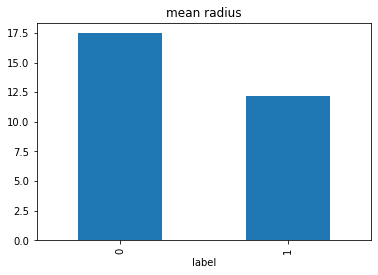

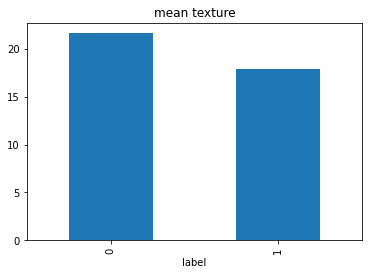

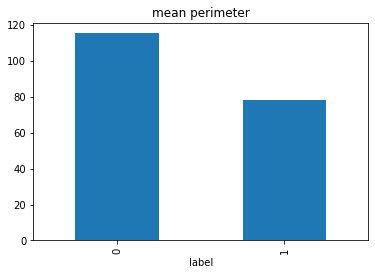

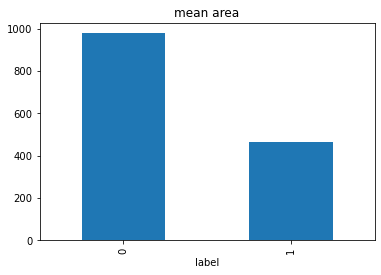

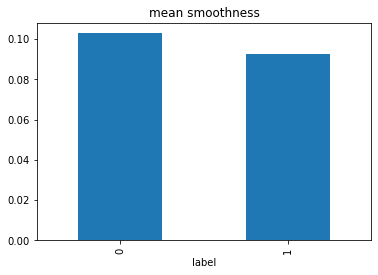

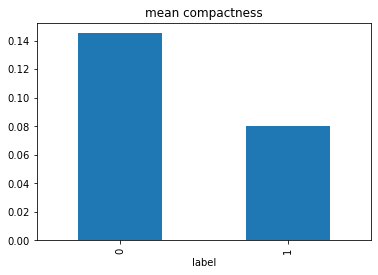

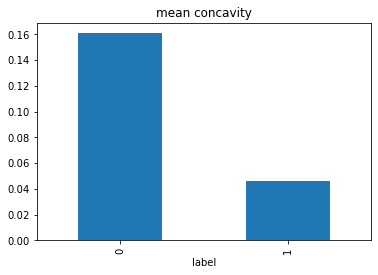

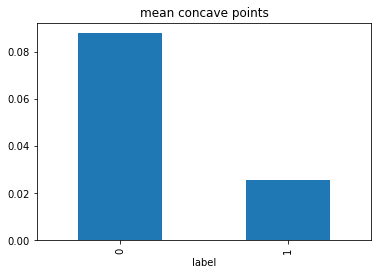

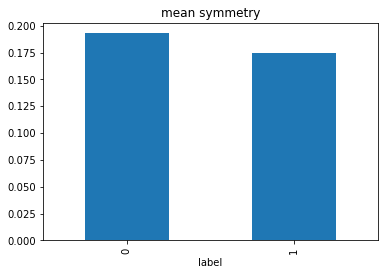

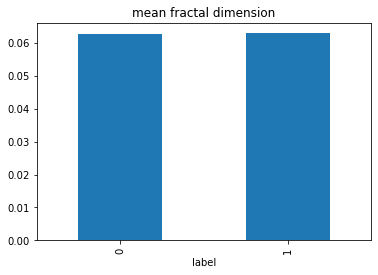

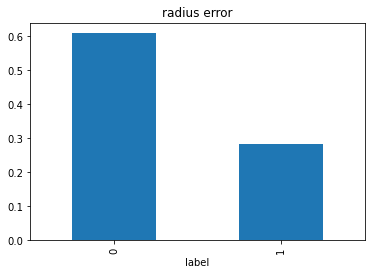

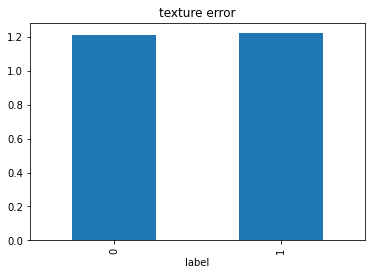

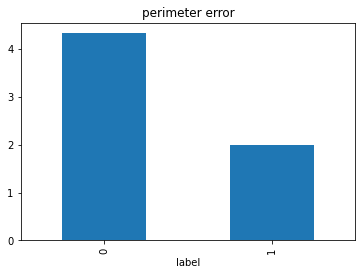

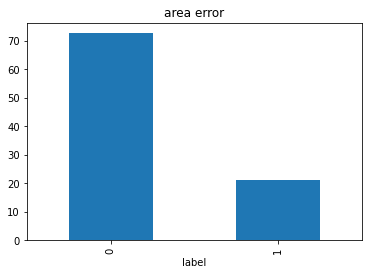

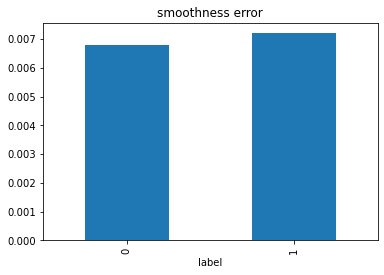

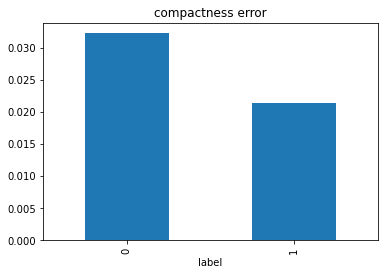

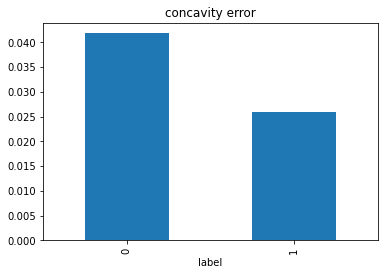

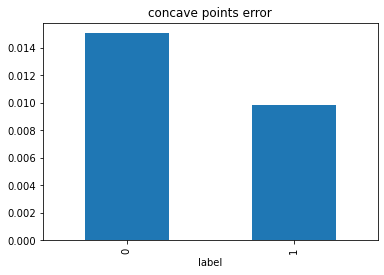

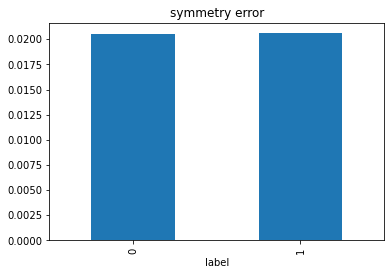

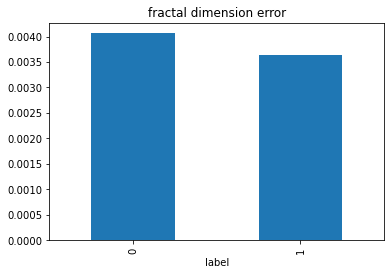

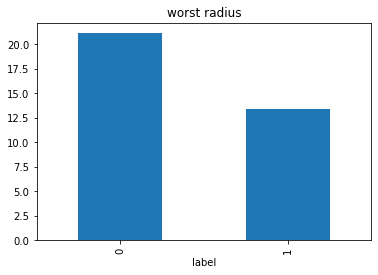

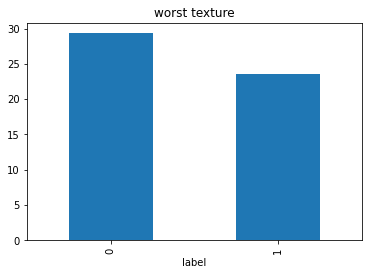

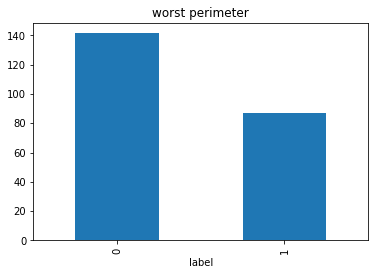

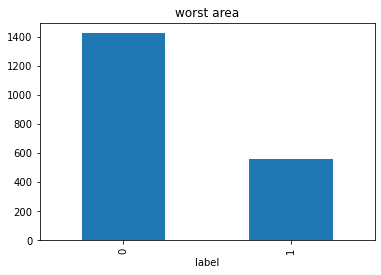

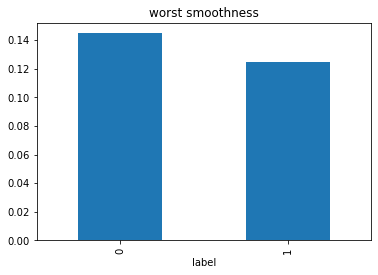

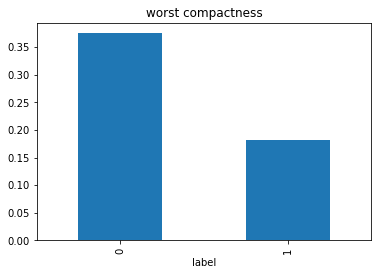

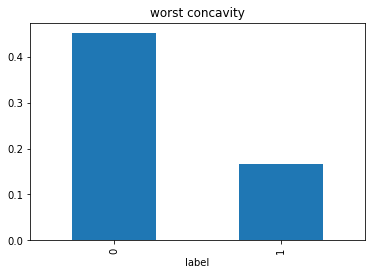

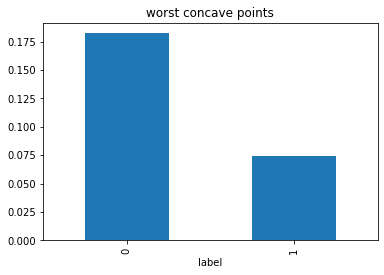

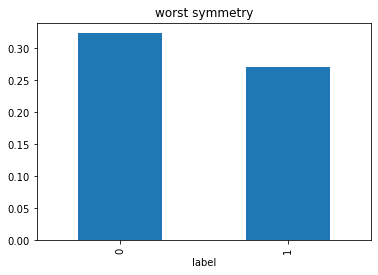

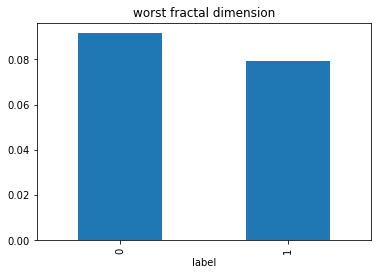

In [4]:
cancer_df_group = cancer_df.groupby('label').mean()
for col in cancer_df_group.columns:
    cancer_df_group[col].plot(kind='bar')
    plt.title(col)
    plt.show()

# Correlation of between the variables

A high correlationship between variables can be appreciated in the heatmap that might be reflected on the similar values of the graphics above. Some varaiables might have the same information. To reduce the calculation time the most relevant variables to predict the output were choosed. To choose the variables with the most relavant information data mining was performed in Weka (Process Not showed).
<br>
A total of 15 variables were removed from the whole data. This new subset of data is called mined data. Some of this variables were mentioned in the previous section.

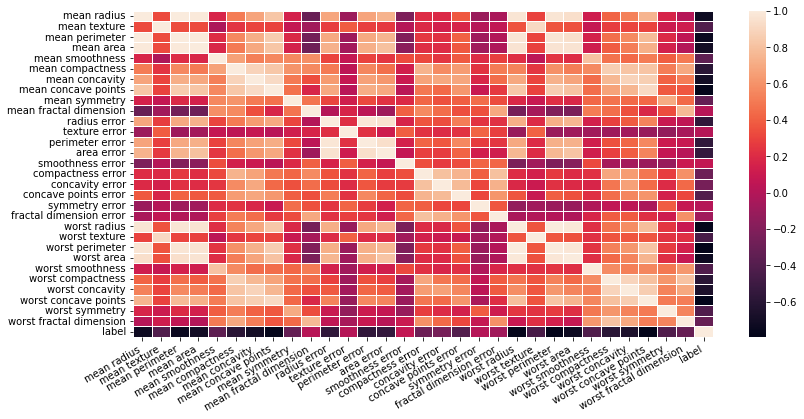

In [5]:
corrmat = cancer_df.corr()

plt.figure(figsize=(13, 6))
sns.heatmap(corrmat, vmax=1,linewidths=.5)
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

## Data mining

Data mining was performed to pick the variables with the most important information using weka. These variable was removed from the whole database. The colormap shows that some white spaces - high correlation - were removed from the data. The new subset of data was remaned by adding the suffix "_mine"

In [6]:
cor_matrix = cancer_df.corr().abs()
print(cor_matrix)
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)


                         mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581      0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension      0.311631      0.076437        0.261477   0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture error               

/var/folders/hv/qfj_qdgn4gs6pb2sb1twprqc0000gn/T/ipykernel_38079/3039138652.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [7]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]
print(); print(to_drop)


['mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst compactness', 'worst concavity', 'worst concave points']


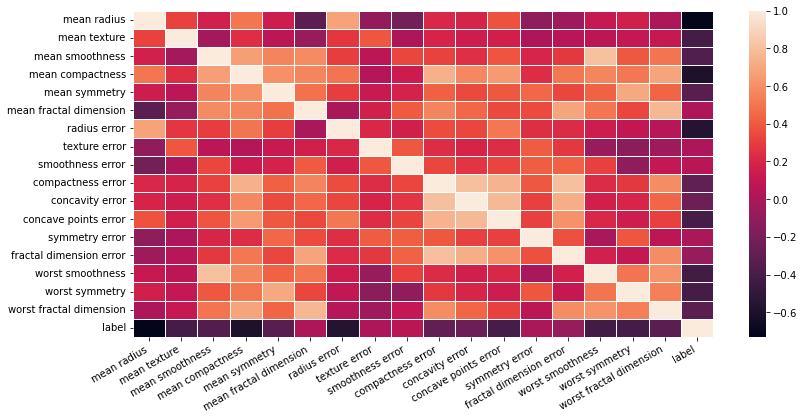

In [8]:
cancer_df_mine = cancer_df.drop(to_drop, axis=1)
#print(df1.shape)
#print(df1.head())
corrmat = cancer_df_mine.corr()

plt.figure(figsize=(13, 6))
sns.heatmap(corrmat, vmax=1,linewidths=.5)
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()
                 

In [9]:
#Axis equal to 1 because I am droping a column
ind_var = cancer_df.drop(columns = 'label', axis =1)
dep_var = cancer_df['label']


ind_var_mine = cancer_df_mine.drop(columns = 'label', axis =1)
dep_var_mine = cancer_df_mine['label']

## Data Standarization

The independent variables has been standarized. Standarized is a scaling technique in Machine Learning applied during data preparation to change the values of numeric columns in the dataset to use a common scale. It is not necessary for all datasets in a model. It is required only when features of machine learning models have different ranges.

In [21]:
scaler =StandardScaler()
scaler.fit(ind_var)
ind_var = scaler.transform(ind_var)

scaler.fit(ind_var_mine)
ind_var = scaler.transform(ind_var_mine)

## Data spliting

In machine learning, data splitting is typically done to avoid overfitting. That is an instance where a machine learning model fits its training data too well and fails to reliably fit additional data.
<br>
The original data in a machine learning model is typically taken and split into three or four sets.


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(ind_var,dep_var, test_size = 0.2, stratify = dep_var, random_state= 2)
print(ind_var.shape, X_train.shape, X_test.shape)


print(Output[0] + " in Training =",Y_train[:].value_counts()[0])
print(Output[1] + " in Training =",Y_train[:].value_counts()[1])
print(Output[0] + " in Test= ",Y_test[:].value_counts()[0])
print(Output[1] + " in Test= ",Y_test[:].value_counts()[1])



(569, 17) (455, 17) (114, 17)
Malignant in Training = 170
Bening in Training = 285
Malignant in Test=  42
Bening in Test=  72


## Training and modelling



### Dataframe to save the outputs

In [12]:
dict= {'Algorithm' : ['Logistic_Regression','SVM','Logistic_Regression','SVM'], 
       'Typedata': ['whole','whole','mined','mined'],
       'Training':[0,0,0,0], 'Test':[0,0,0,0]}

df=pd.DataFrame(dict)
df= df.set_index(['Typedata','Algorithm'])

### With Whole data

### Logistic Regression

In [13]:
print('Logistic Regression')

model = LogisticRegression()
model.fit(X_train, Y_train)
# accuracy on training data
Y_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, Y_train_prediction)
print('Accuracy on training data = ', "{:.4f}".format(training_data_accuracy))

# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on test data = ', "{:.4f}".format(test_data_accuracy))

df.iloc[0,0]=training_data_accuracy
df.iloc[0,1]=test_data_accuracy


y_actual_lg = pd.Series(Y_train, name='Actual')
y_predicted_lg = pd.Series(Y_train_prediction, name='Predicted')

#create confusion matrix
log_reg=pd.crosstab(y_actual_lg, y_predicted_lg)


Logistic Regression
Accuracy on training data =  0.9758
Accuracy on test data =  0.9825


### Super Vector Machine
SVC is super vector clasifier

In [14]:
print('SVM')
# Define the classifier
model = svm.SVC(kernel= 'linear')
model.fit(X_train, Y_train)


Y_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, Y_train_prediction)
print('Accuracy on training data = ', "{:.4f}".format(training_data_accuracy))

# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on test data = ', "{:.4f}".format(test_data_accuracy))

df.iloc[1,0]=training_data_accuracy
df.iloc[1,1]=test_data_accuracy

y_actual_SVM = pd.Series(Y_train, name='Actual')
y_predicted_SVM = pd.Series(Y_train_prediction, name='Predicted')

#create confusion matrix
SVM=pd.crosstab(y_actual_SVM, y_predicted_SVM)




SVM
Accuracy on training data =  0.9780
Accuracy on test data =  0.9825


### Logistic Regression

### With mined data

In [15]:
print('Logistic Regression')
X_train, X_test, Y_train, Y_test = train_test_split(ind_var_mine,dep_var_mine, test_size = 0.2, stratify = dep_var, random_state= 2)

model = LogisticRegression()
model.fit(X_train, Y_train)
# accuracy on training data

Y_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, Y_train_prediction)
print('Accuracy on training data = ', "{:.4f}".format(training_data_accuracy))

# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on test data = ', "{:.4f}".format(test_data_accuracy))

df.iloc[2,0]= training_data_accuracy
df.iloc[2,1]= test_data_accuracy

y_actual_lgm = pd.Series(Y_train, name='Actual')
y_predicted_lgm = pd.Series(Y_train_prediction, name='Predicted')

#create confusion matrix
log_reg_mine=pd.crosstab(y_actual_lgm, y_predicted_lgm)



Logistic Regression
Accuracy on training data =  0.9055
Accuracy on test data =  0.9211


### Super vector Machine

In [16]:
print('SVM')
# Define the classifier
model = svm.SVC(kernel= 'linear')
model.fit(X_train, Y_train)

Y_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, Y_train_prediction)
print('Accuracy on training data = ', "{:.4f}".format(training_data_accuracy))

# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on test data = ', "{:.4f}".format(test_data_accuracy))

df.iloc[3,0]=training_data_accuracy
df.iloc[3,1]=test_data_accuracy
y_actual_SVMm = pd.Series(Y_train, name='Actual')
y_predicted_SVMm = pd.Series(Y_train_prediction, name='Predicted')

#create confusion matrix
SVM_mine=pd.crosstab(y_actual_SVMm, y_predicted_SVMm)




SVM
Accuracy on training data =  0.9231
Accuracy on test data =  0.9474


                              Training      Test
Typedata Algorithm                              
whole    Logistic_Regression  0.975824  0.982456
         SVM                  0.978022  0.982456
mined    Logistic_Regression  0.905495  0.921053
         SVM                  0.923077  0.947368


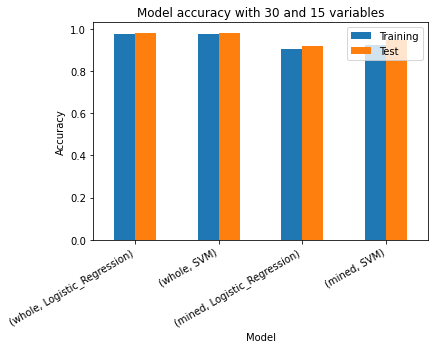

In [17]:
print(df)
plot = df.plot.bar()

plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=30, horizontalalignment='right')
plt.title("Model accuracy with 30 and 15 variables")


plt.show()

## Confusion Matrix

Explain sensitivy and put an image with the true positive and negative. (What each square mean)

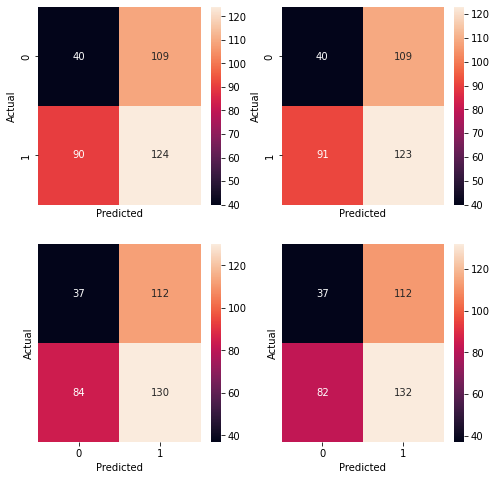

In [18]:
plt.figure(1, figsize=(8, 8))

plt.subplot(2,2,1)
sns.heatmap(log_reg,xticklabels=False ,annot = True, fmt='g')
plt.subplot(2,2,2)
sns.heatmap(SVM,xticklabels=False,annot = True, fmt='g')
plt.subplot(2,2,3)
sns.heatmap(log_reg_mine,yticklabels=False,annot = True, fmt='g')
plt.subplot(2,2,4)
sns.heatmap(SVM_mine,yticklabels=False,annot = True, fmt='g')
plt.show()

#print(log_reg)
#print(SVM)
#print(log_reg_mine)
#print(SVM_mine)
#
#sns.heatmap(log_reg,annot=True)
#plt.show()
#sns.heatmap(SVM,annot=True)
#plt.show()
#sns.heatmap(log_reg_mine,annot=True)
#plt.show()
#sns.heatmap(SVM_mine,annot=True)
#plt.show()

## Receiver Operating Characteristic Curve (ROC)

ROC stands for Receiver Operating Characteristic Curve, a graph that shows the performance of binary classification models. It is used to plot two parameters which are the true positive rate and the false positive rate.

### Area Under Curve (AUC) of ROC

<p>The AUC is between 0 and 1. A classification model with 100% bad predictions will have an AUC score of 0.0, while a classification model with 100% true predictions will represent the AUC score of 1.0. <p>

<p>To assess how well a classification model fits a dataset, we can look at the following two metrics:<p>


**Sensitivity:**  The probability that the model predicts a positive outcome for an observation when indeed the outcome is positive. This is also called the “true positive rate.”
<br>
True Positive Rate = Total Positive / Total Positive + False Negative
<br>
**Specificity:** The probability that the model predicts a negative outcome for an observation when indeed the outcome is negative. This is also called the “true negative rate.”<br>
False Positive Rate = False Positive / False Positive + True Negative
<br>

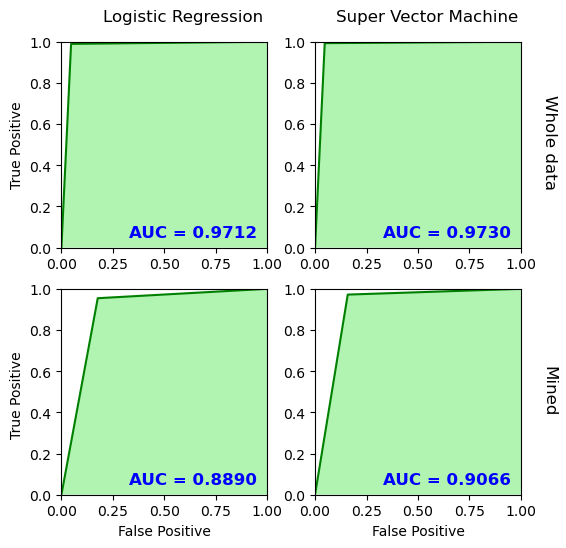

In [19]:

auc = metrics.roc_auc_score(y_actual_lg, y_predicted_lg)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_actual_lg, y_predicted_lg)

plt.figure(figsize=(6, 6), dpi=100)

n=12

plt.subplot(2,2,1)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.text(0.2, 1.1, r"Logistic Regression" ,linespacing =2.50,size=n)
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
#plt.xlabel("False Positive Rate")
plt.ylabel("True Positive")


plt.subplot(2,2,2)

auc1 = metrics.roc_auc_score(y_actual_SVM, y_predicted_SVM)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_actual_SVM, y_predicted_SVM)

#plt.figure(figsize=(5, 4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.text(0.1, 1.1, r"Super Vector Machine" ,linespacing =2.50,size=n)
plt.text(1.1, 0.3, r'Whole data', rotation=270,size=n)
#plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc1, ha='right', fontsize=12, weight='bold', color='blue')
#plt.xlabel("False Positive Rate")
#plt.ylabel("True Positive Rate")



plt.subplot(2,2,3)
auc2 = metrics.roc_auc_score(y_actual_lgm, y_predicted_lgm)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_actual_lgm, y_predicted_lgm)

#plt.figure(figsize=(5, 4), dpi=100)

plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
#plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc2, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive")
plt.ylabel("True Positive ")

plt.subplot(2,2,4)
auc3 = metrics.roc_auc_score(y_actual_SVMm, y_predicted_SVMm)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_actual_SVMm, y_predicted_SVMm)

#plt.figure(figsize=(5, 4), dpi=100)

plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.text(1.1, 0.4, r'Mined', rotation=270,size=n)
#plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc3, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive")
#plt.ylabel("True Positive Rate")
plt.show()
